# <span style="color:#0F19C9">Contents</span>

- [Importing and reading data](#importing-and-reading-data)
- [Data understanding](#data-understanding)
- [Univariable analysis](#univariable-analysis)

# <span style="color:#0F19C9">Importing and reading data</span>

In [25]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# Import my color palette
juan_colors = ['#101B4B', '#545E85', '#A3A8B2',
               '#E7E7E7', '#0F19C9', '#F6D673']

# Setting plot font
plt.rc('font', family='Georgia', size=12)

In [27]:
# Import the processed file
df = pd.read_csv('../Data/Processed/processed_data.csv')

# <span style="color:#0F19C9">Data understanding</span>

In [28]:
# Display the shape of the dataframe
df.shape

(61210, 7)

In [29]:
# Show the first 5 rows
df.head(5)

,User_ID,Track,Artist,Genre,City,Hour_of_Play,Day_of_the_Week
0,FFB692EC,Kamigata To Boots,The Mass Missile,Rock,Shelbyville,20:28:33,Wednesday
1,55204538,Delayed Because of Accident,Andreas Rönnberg,Rock,Springfield,14:07:09,Friday
2,20EC38,Funiculì funiculà,Mario Lanza,Pop,Shelbyville,20:58:07,Wednesday
3,A3DD03C9,Dragons in the Sunset,Fire + Ice,Folk,Shelbyville,08:37:09,Monday
4,E2DC1FAE,Soul People,Space Echo,Dance,Springfield,08:34:34,Monday


In [30]:
# Change the type of data of 'Hour_of_Play'
df['Hour_of_Play'] = pd.to_datetime(
    df['Hour_of_Play'], format='%H:%M:%S').dt.time

We have 61.210 rows with the music consumption of two United States cities. We have cleaned the set and these are the final and clean dataset to work.

# <span style="color:#0F19C9">Univariable analysis</span>

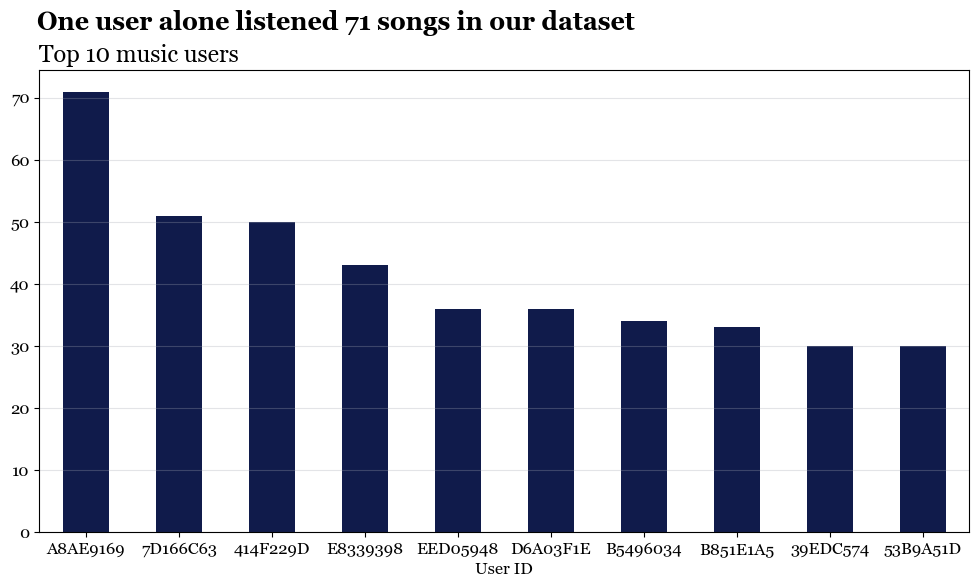

User_ID
A8AE9169    71
7D166C63    51
414F229D    50
E8339398    43
EED05948    36
D6A03F1E    36
B5496034    34
B851E1A5    33
39EDC574    30
53B9A51D    30
Name: count, dtype: int64

In [120]:
# Top Users
fig, ax = plt.subplots(figsize=[12, 6])


df['User_ID'].value_counts().head(10).plot.bar(color=juan_colors[0], ax=ax)
plt.suptitle('One user alone listened 71 songs in our dataset',
             ha='left', x=0.123, size=18, weight='bold')
plt.title('Top 10 music users', loc='left', size=17)


plt.xlabel('User ID')


plt.grid(True, color=juan_colors[2],
         axis='y', alpha=0.3)
plt.xticks(rotation=0)
plt.show()

# Show the count


df['User_ID'].value_counts().head(10)

In [74]:
# Count the unique tracks
df['Track'].nunique() / df.shape[0] * 100

64.77209606273485

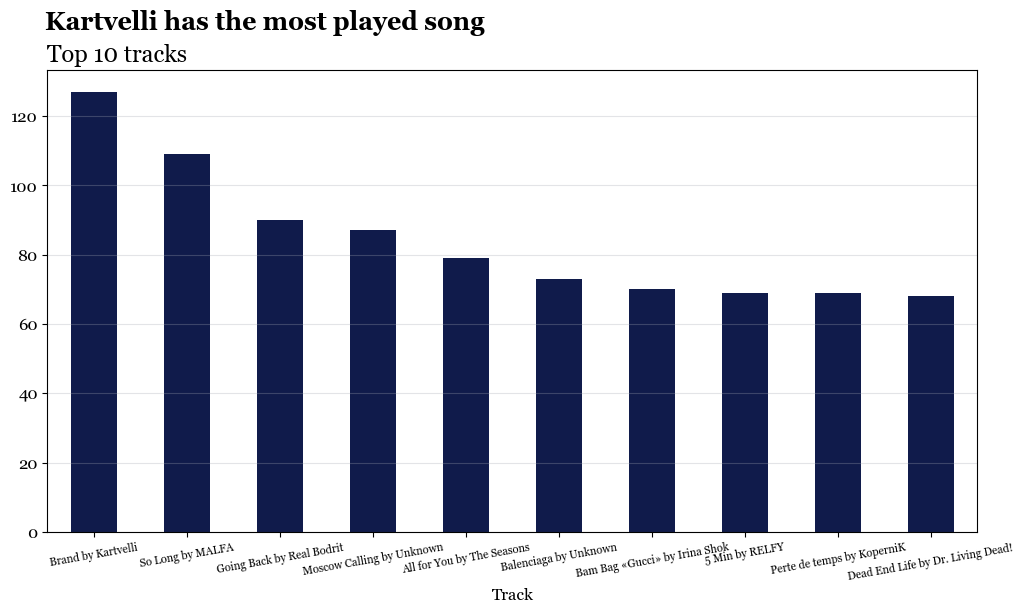

In [124]:
# Most listened tracks
df['Track_n_Artist'] = df['Track'] + ' by ' + df['Artist']
fig, ax = plt.subplots(figsize=[12, 6])
df['Track_n_Artist'].value_counts().iloc[1:11] \
    .plot.bar(color=juan_colors[0], ax=ax)
plt.suptitle('Kartvelli has the most played song',
             ha='left', x=0.123, size=18, weight='bold')
plt.title('Top 10 tracks', loc='left', size=17)
plt.xlabel('Track')
plt.grid(True, color=juan_colors[2], axis='y',
         alpha=0.3)
plt.xticks(rotation=10, size=8)
plt.show()

# Show the count in a table
df['Track_n_Artist'].value_counts().iloc[0:11]
df.drop(columns=['Track_n_Artist'], inplace=True)

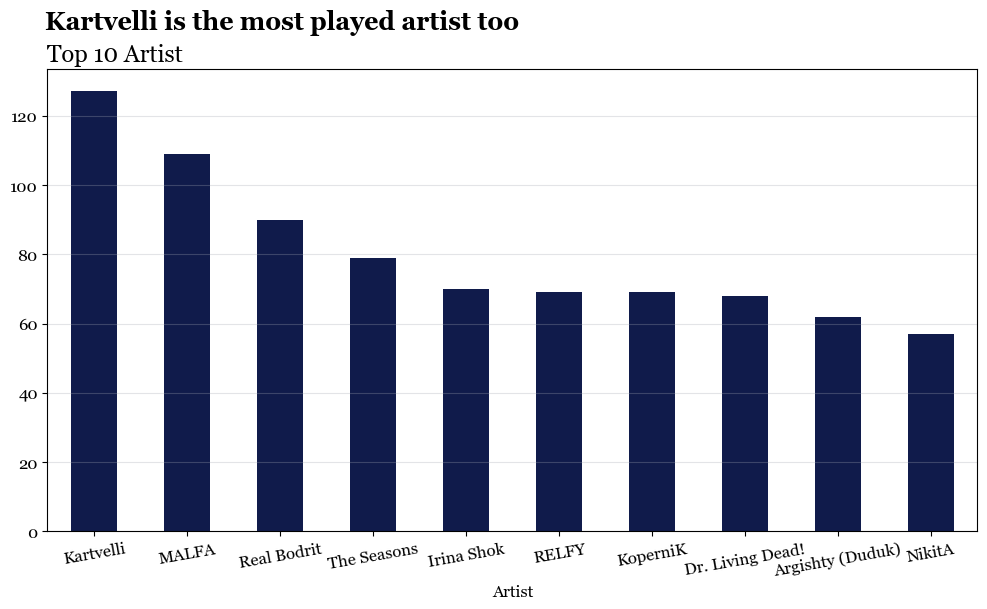

Artist
Unknown             7093
Kartvelli            127
MALFA                109
Real Bodrit           90
The Seasons           79
Irina Shok            70
RELFY                 69
KoperniK              69
Dr. Living Dead!      68
Argishty (Duduk)      62
NikitA                57
Name: count, dtype: int64

In [139]:
fig, ax = plt.subplots(figsize=[12, 6])
df['Artist'].value_counts().iloc[1:11] \
    .plot.bar(color=juan_colors[0], ax=ax)
plt.suptitle('Kartvelli is the most played artist too',
             ha='left', x=0.123, size=18, weight='bold')
plt.title('Top 10 Artist', loc='left', size=17)
plt.xticks(rotation=10)
plt.grid(True, color=juan_colors[2],
         axis='y', alpha=0.3)
plt.show()

# Show the count in a table
df['Artist'].value_counts().head(11)

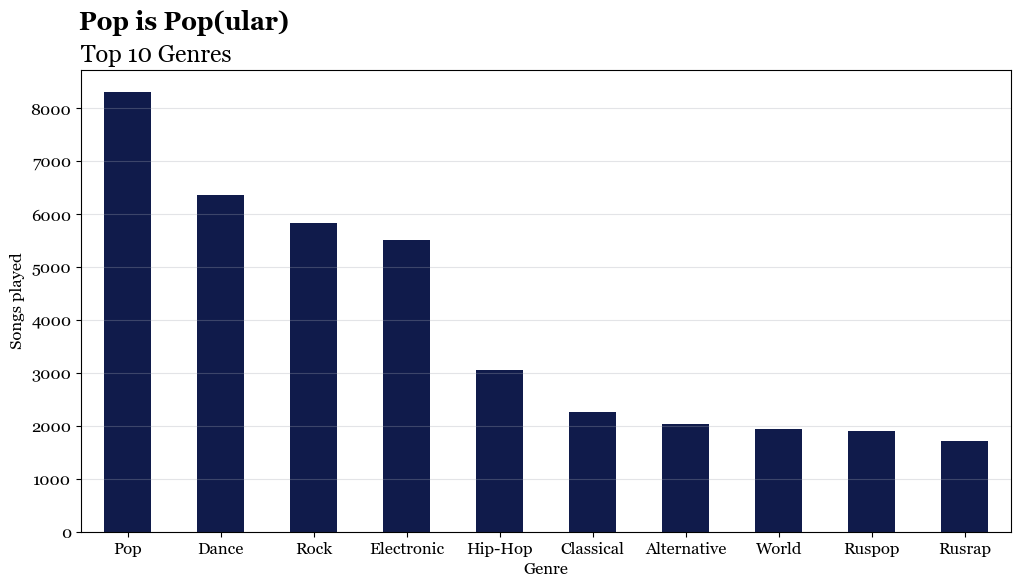

Genre
Pop            8316
Dance          6362
Rock           5839
Electronic     5520
Hip-Hop        3055
Classical      2260
Alternative    2028
World          1945
Ruspop         1909
Rusrap         1724
Name: count, dtype: int64

In [260]:
fig, ax = plt.subplots(figsize=[12, 6])
df['Genre'].value_counts().head(10) \
    .plot.bar(color=juan_colors[0], ax=ax)
plt.suptitle('Pop is Pop(ular)', weight='bold',
             ha='left', x=0.123, size=18)
plt.title('Top 10 Genres', loc='left',
          size=17)
plt.xticks(rotation=0)
plt.ylabel('Songs played')
plt.grid(True, color=juan_colors[2],
         axis='y', alpha=0.3)
plt.show()

# Show the count in a table
df['Genre'].value_counts().head(10)

In [154]:
# Find the percentage of popular genres
df['Genre'].value_counts().iloc[0:4].sum() / df.shape[0] * 100

42.53716712955399

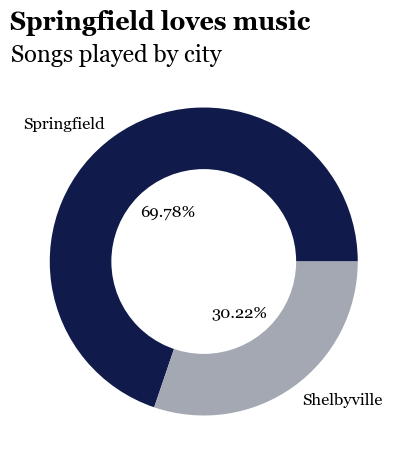

In [212]:
# Create city plot
fix, ax = plt.subplots(figsize=[5, 5])
df['City'].value_counts() \
    .plot.pie(autopct='%1.2f%%', pctdistance=0.4,
              colors=[juan_colors[0], juan_colors[2]],
              ax=ax)
plt.suptitle('Springfield loves music', ha='left',
             x=0.125, y=1, size=18, weight='bold')
plt.title('Songs played by city', loc='left',
          size=17)
plt.ylabel('')
hole = plt.Circle((0, 0), 0.6, facecolor='white')
plt.gcf().gca().add_artist(hole)
plt.show()

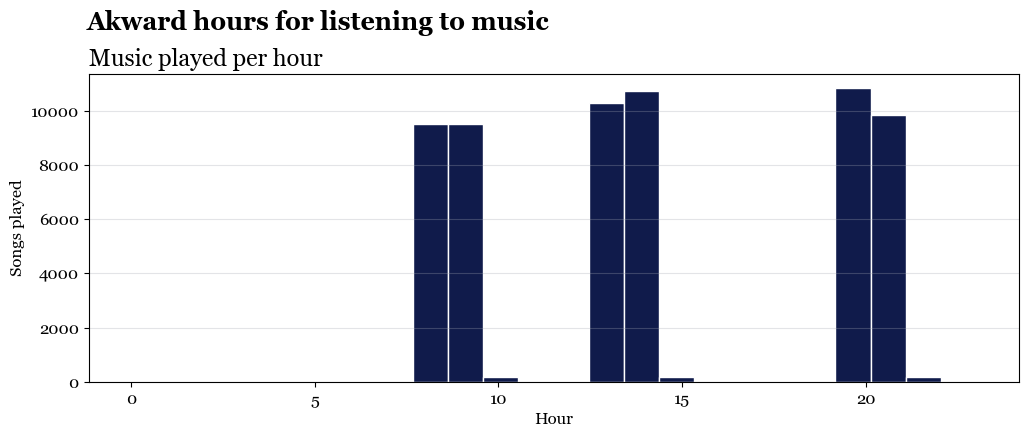

In [259]:
# Create de hour column
df['Hour'] = pd.to_datetime(df['Hour_of_Play'], format='%H:%M:%S').dt.hour

fig, ax = plt.subplots(figsize=[12, 4])
plt.hist(df['Hour'], bins=24, range=(0, 23), edgecolor='white',
         color=juan_colors[0])
plt.suptitle('Akward hours for listening to music', ha='left',
             x=0.123, y=1.04, size=18, weight='bold')
plt.title('Music played per hour', loc='left',
          size=17)
plt.xlabel('Hour')
plt.ylabel('Songs played')
plt.grid(True, color=juan_colors[2],
         axis='y', alpha=0.3)
plt.show()

# Show the count in a table
df['Hour'].value_counts().sort_index()
df.drop(columns=['Hour'], inplace=True)

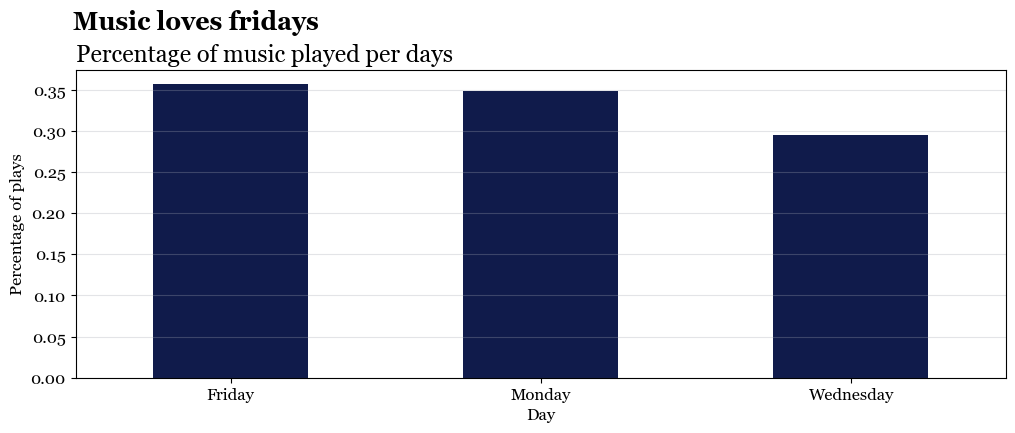

Day_of_the_Week
Friday       21827
Monday       21338
Wednesday    18045
Name: count, dtype: int64

In [266]:
fig, ax = plt.subplots(figsize=[12, 4])
df['Day_of_the_Week'].value_counts(normalize=True) \
    .plot.bar(color=juan_colors[0], ax=ax)
plt.suptitle('Music loves fridays', ha='left',
             x=0.123, y=1.03, size=18, weight='bold')
plt.title('Percentage of music played per days',
          size=17, loc='left')
plt.xlabel('Day')
plt.xticks(rotation=0)
plt.ylabel('Percentage of plays')
plt.grid(True, color=juan_colors[2],
         axis='y', alpha=0.3)
plt.show()

# Show the count in a table
df['Day_of_the_Week'].value_counts()

We found that we do not have unique user rows, our top user has from 71 to 30 rows of music played.

The 64.77% of rows has unique Tracks and the unknown name and artist tracks has the most amount of played tracks with 1260, we are not going to drop them because they are not that significant for this analysis. Later we found on our list the song Brand by Kartvelli with 127 records, then So Long by MALFA with 109 records and Going Back by Real Bodrit with 90 records.

In the same way, Kartvelli has the most amount of played songs with 127 records after the unknown records that are 7093. In the third position, we found MALFA with 109 records and Real Bodrit with 90 records.

About genres, Pop with 8316 songs played, Dance music with 6362 songs played, Rock music with 5839 songs played and Electronic music with 5520 represents the 42.53% of all played music are the favorite music genres of those two cities. Followed by Hip-Hop, Classical, Alternative and World music.

The same week, Springfield has the 69.78% of the records played agains 30.22% of Shelbyville, that is a clear difference between the amound of music played and differences of consumption.

Talking about the hour of playing, we have a significant problem with our dataframe, because we have a giant bias, it is not logical that the people listen to music just three hours in a single day, and that there are zero played songs on another hours. And other bias we have in our dataset is about the day of the week, because we have only records of monday, wednesday and friday, been friday and monday the days with most music played, more than 21000 records, and wednesday is the worst day with 18045 records.